In [52]:
import tensorflow as tf 
import cv2
import os 
import matplotlib.pyplot as plt 
import numpy as np

In [53]:
img_array = cv2.imread("train\Closed_Eyes\s0001_00017_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

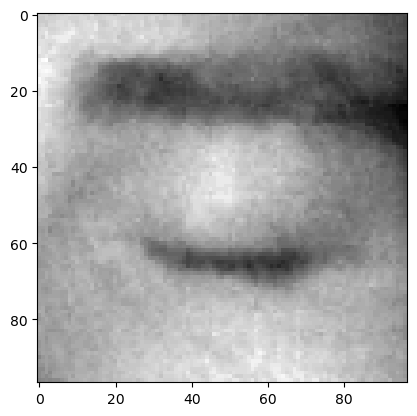

In [54]:
plt.imshow(img_array, cmap = "gray")

In [55]:
img_array.shape

(97, 97)

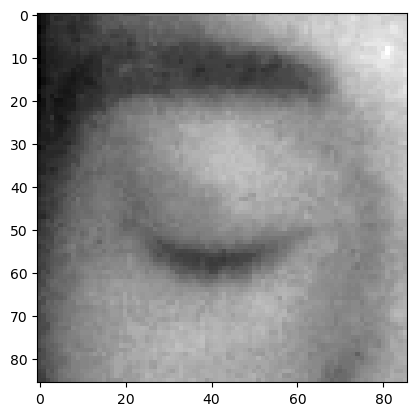

In [57]:
dataDirect = "train/"
classes = ["Closed_Eyes", "Open_Eyes"]
for category in classes: 
    path = os.path.join(dataDirect, category)
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break 
    break

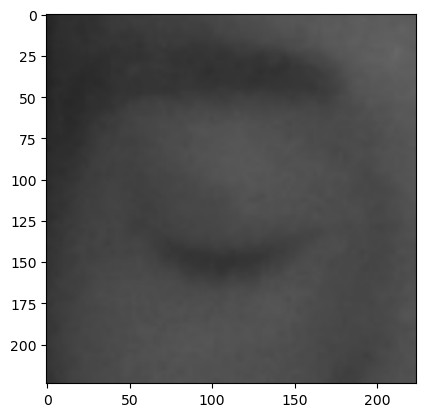

In [58]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [59]:
#read all imgs and convert to array for data and labels 

In [60]:
trainData = []

def create_trainData(): 
    for category in classes: 
        path = os.path.join(dataDirect, category)
        class_num = classes.index(category)
        for img in os.listdir(path): 
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                trainData.append([new_array, class_num])
            except Exception as e: 
                pass

In [61]:
create_trainData()

In [62]:
print(len(trainData))

4000


In [63]:
import random
random.shuffle(trainData)

In [64]:
X = []
y = []

for features,label in trainData: 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [65]:
X.shape

(4000, 224, 224, 3)

In [66]:
#normalize the data 
X = X/255.0;

In [67]:
Y = np.array(y)

In [68]:
import pickle 
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [69]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)


deep learning model for training - Training Learning

In [70]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [71]:
model = tf.keras.applications.mobilenet.MobileNet()

In [72]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

transfer learning

In [73]:
base_input = model.layers[0].input #input

In [74]:
base_output = model.layers[-4].output #output

In [75]:
flatLayer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flatLayer)
final_output = layers.Activation('sigmoid')(final_output)

In [76]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [77]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

settings for binary classification

In [78]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [227]:
history = new_model.fit(X, Y, epochs = 5, validation_split = 0.4) #training

Epoch 1/5
75/75 [==============================] - 289s 3s/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 5.6122e-06 - val_accuracy: 1.0000
Epoch 2/5
75/75 [==============================] - 211s 3s/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0764 - val_accuracy: 0.9806
Epoch 3/5
75/75 [==============================] - 193s 3s/step - loss: 0.0107 - accuracy: 0.9975 - val_loss: 0.2537 - val_accuracy: 0.9569
Epoch 4/5
75/75 [==============================] - 195s 3s/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0396 - val_accuracy: 0.9787
Epoch 5/5
75/75 [==============================] - 207s 3s/step - loss: 9.5486e-04 - accuracy: 0.9996 - val_loss: 2.0750e-06 - val_accuracy: 1.0000


In [229]:
new_model.save("modelNo4")

INFO:tensorflow:Assets written to: modelNo4\assets


INFO:tensorflow:Assets written to: modelNo4\assets


In [230]:
new_model = tf.keras.models.load_model("modelNo4")

checking network for predictions

In [231]:
img_array = cv2.imread("test(1)\s0012_05932_0_0_1_2_1_03.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [232]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [233]:
X_input.shape

(1, 224, 224, 3)

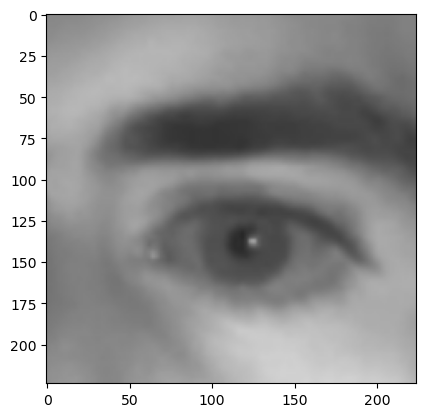

In [234]:
plt.imshow(new_array)

In [235]:
X_input = X_input/255.0

In [236]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 2s 2s/step


In [237]:
prediction

array([[1.]], dtype=float32)

check other images

In [238]:
img = cv2.imread("img7.png")

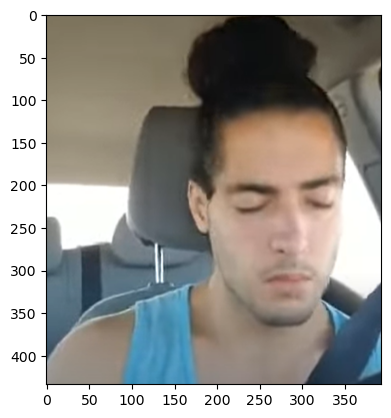

In [239]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [240]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [241]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [242]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [243]:
eyes = eyeCascade.detectMultiScale(gray, 1.1,4)

In [244]:
for (x, y, w, h) in eyes: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

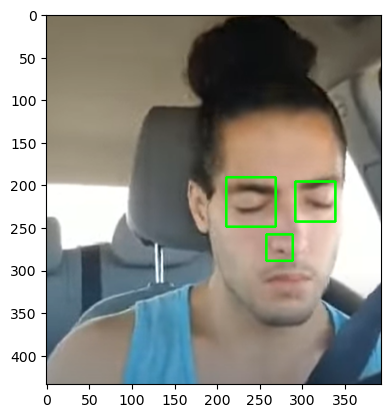

In [245]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cropping the eye image

In [246]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes: 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0: 
        print("No eyes detected")
    else: 
        for (ex, ey, ew, eh) in eyess: 
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

No eyes detected


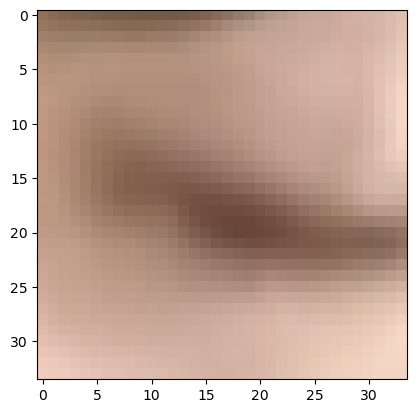

In [247]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [248]:
eyes_roi.shape

(34, 34, 3)

In [249]:
fix_img = cv2.resize(eyes_roi, (224, 224))
fix_img = np.expand_dims(fix_img, axis = 0)
fix_img = fix_img/255.0

In [250]:
fix_img.shape

(1, 224, 224, 3)

In [251]:
new_model.predict(fix_img)

1/1 [==============================] - 0s 157ms/step


array([[0.60039395]], dtype=float32)

In [191]:
import winsound
frequency = 2500
duration = 1000

import numpy as np 
import cv2 
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#check if webcam working properly
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened(): 
    raise IOError("Cannot open webcam")
counter = 0
while True: 
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes: 
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = frame[y: y+h, x: x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyeCascade.detectMultiScale(roi_gray) #check if there are more than a pair of eyes
        if len(eyess) == 0: 
            print("No eyes detected")
        else: 
            for (ex, ey, ew, eh) in eyess: 
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

    fix_img = cv2.resize(eyes_roi, (224, 224))
    fix_img = np.expand_dims(fix_img, axis = 0)
    fix_img = fix_img/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    prediction = new_model.predict(fix_img)
    if (prediction >= 0.505): 
        status = "Open Eyes"
        cv2.putText(frame, 
                    status, 
                    (150, 150), 
                    font, 3, 
                    (0, 255, 0), 
                    2, 
                    cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75

        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, 'Awake', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else: 
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, 
                    status, 
                    (150, 150), 
                    font, 3, 
                    (0, 255, 0), 
                    2, 
                    cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter > 5: 
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Sleepy Alert!!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            winsound.Beep(frequency, duration)
            counter = 0

   
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'): 
        break 

cap.release()
cv2.destroyAllwindows()

1/1 [==============================] - 0s 189ms/step
No eyes detected
No eyes detected
1/1 [==============================] - 0s 183ms/step
No eyes detected
1/1 [==============================] - 0s 227ms/step
No eyes detected
1/1 [==============================] - 0s 243ms/step
No eyes detected
1/1 [==============================] - 0s 194ms/step
No eyes detected
1/1 [==============================] - 0s 96ms/step
No eyes detected
1/1 [==============================] - 0s 99ms/step
No eyes detected
1/1 [==============================] - 0s 100ms/step
No eyes detected
No eyes detected
1/1 [==============================] - 0s 180ms/step
No eyes detected
1/1 [==============================] - 0s 228ms/step
No eyes detected
1/1 [==============================] - 0s 225ms/step


KeyboardInterrupt: 

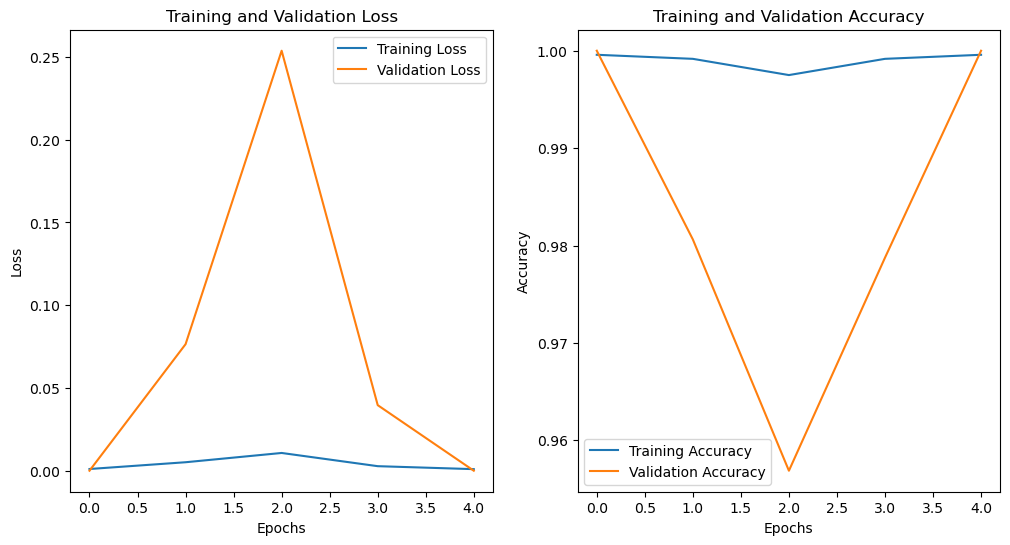

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras
from keras import layers

loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss and accuracy
epochs_range = range(5)  # Adjust according to the number of epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()